In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data=pd.read_csv("./churn_prediction_data/train.csv")
test_data=pd.read_csv("./churn_prediction_data/test.csv")

In [2]:
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [3]:
train_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


# 變數說明
<img src="column_intro.JPG">

In [4]:
#無遺失值
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.1+ KB


In [5]:
#離開與否的個數比較
train_data["Exited"].value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

## 針對「性別」做簡單的統計分析

In [6]:
train_data["Gender"].value_counts()

Male      4371
Female    3629
Name: Gender, dtype: int64

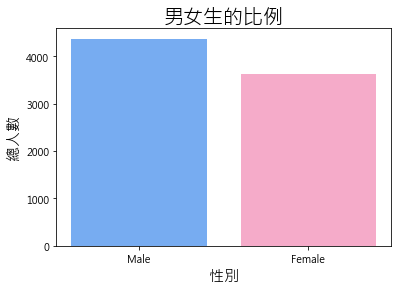

In [7]:
genders=train_data["Gender"].value_counts()
x = np.arange(len(genders))
plt.bar(x, genders, color=['#77acf1', '#f5abc9'])
plt.xticks(x, genders.index)
plt.xlabel('性別', fontsize=15)
plt.ylabel('總人數', fontsize=15)
plt.title('男女生的比例', fontsize=20)
plt.show()

In [8]:
train_data.groupby(["Gender","Exited"]).count()["CustomerId"]

Gender  Exited
Female  0         2721
        1          908
Male    0         3647
        1          724
Name: CustomerId, dtype: int64

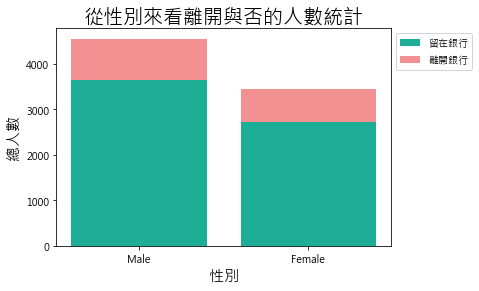

In [9]:
remain=train_data[train_data["Exited"]==0]["Gender"].value_counts()
exit=train_data[train_data["Exited"]==1]["Gender"].value_counts()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, genders.index)
plt.xlabel('性別', fontsize=15)
plt.ylabel('總人數', fontsize=15)
plt.title('從性別來看離開與否的人數統計', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [10]:
#男生離開機率
man_count=train_data[train_data["Gender"]=="Male"]["Exited"].value_counts()
man_count.index=["remain","exit"]
man_count/sum(man_count)

remain    0.834363
exit      0.165637
Name: Exited, dtype: float64

In [11]:
#女生離開機率
man_count=train_data[train_data["Gender"]=="Female"]["Exited"].value_counts()
man_count.index=["remain","exit"]
man_count/sum(man_count)

remain    0.749793
exit      0.250207
Name: Exited, dtype: float64

In [12]:
#在留下銀行的人裡面，男女比例
remain/sum(remain)

Male      0.572707
Female    0.427293
Name: Gender, dtype: float64

In [13]:
#在離開銀行的人裡面，男女比例
exit/sum(exit)

Female    0.556373
Male      0.443627
Name: Gender, dtype: float64

In [14]:
train_data["Gender"]=train_data["Gender"].apply(lambda x: 1 if x == 'Male' else 0)

## 針對「國家」做簡單的統計分析

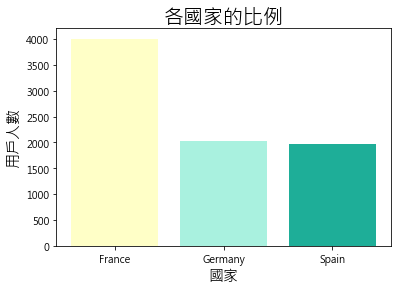

In [15]:
country=train_data["Geography"].value_counts()
x = np.arange(len(country))
plt.bar(x, country, color=['#ffffc7', '#a9f1df',"#1eae98"])
plt.xticks(x, country.index)
plt.xlabel('國家', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('各國家的比例', fontsize=20)
plt.show()

In [16]:
train_data.groupby(["Geography","Exited"]).count()["CustomerId"]

Geography  Exited
France     0         3361
           1          645
Germany    0         1369
           1          649
Spain      0         1638
           1          338
Name: CustomerId, dtype: int64

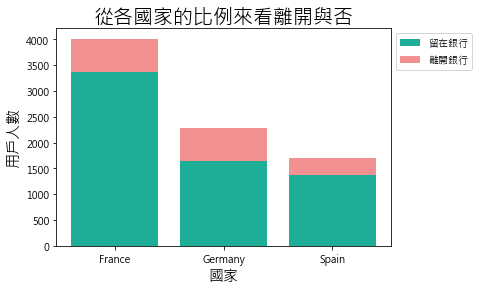

In [17]:
remain=train_data[train_data["Exited"]==0]["Geography"].value_counts()
exit=train_data[train_data["Exited"]==1]["Geography"].value_counts()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, country.index)
plt.xlabel('國家', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('從各國家的比例來看離開與否', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [18]:
#法國離開機率
man_count=train_data[train_data["Geography"]=="France"]["Exited"].value_counts()
man_count.index=["remain","exit"]
man_count/sum(man_count)

remain    0.838992
exit      0.161008
Name: Exited, dtype: float64

In [19]:
#德國離開機率
man_count=train_data[train_data["Geography"]=="Germany"]["Exited"].value_counts()
man_count.index=["remain","exit"]
man_count/sum(man_count)

remain    0.678394
exit      0.321606
Name: Exited, dtype: float64

In [20]:
#西班牙離開機率
man_count=train_data[train_data["Geography"]=="Spain"]["Exited"].value_counts()
man_count.index=["remain","exit"]
man_count/sum(man_count)

remain    0.828947
exit      0.171053
Name: Exited, dtype: float64

#### 小結論：
資料人數：法國人>>德國人>西班牙人

離開率：德國>>西班牙>法國

## 針對「CreditScore 」做分析

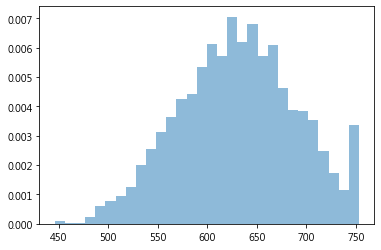

In [21]:
plt.hist(train_data["CreditScore"], density=True,bins=30,alpha=0.5)
plt.show()

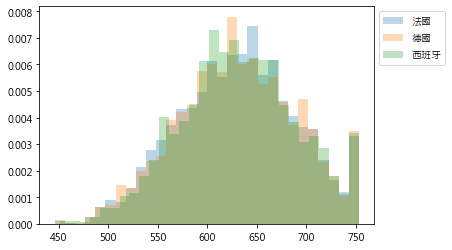

In [22]:
#國家對於信賴分數差異
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=30) 
plt.hist(train_data[train_data["Geography"]=="France"]["CreditScore"], **kwargs,label="法國") 
plt.hist(train_data[train_data["Geography"]=="Germany"]["CreditScore"], **kwargs,label="德國") 
plt.hist(train_data[train_data["Geography"]=="Spain"]["CreditScore"], **kwargs,label="西班牙")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


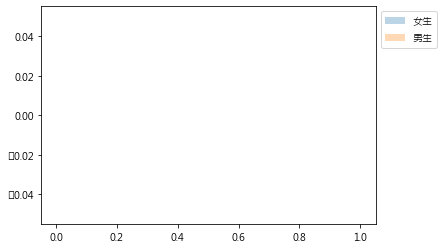

In [23]:
#國家對於信賴分數差異
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40) 
plt.hist(train_data[train_data["Gender"]=="Female"]["CreditScore"],**kwargs, label="女生" ) 
plt.hist(train_data[train_data["Gender"]=="Male"]["CreditScore"], **kwargs, label="男生" ) 
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [24]:
train_data.groupby(["Geography"]).agg({"CreditScore":["describe"]})

CreditScore                                                     \
             describe                                                      
                count        mean        std    min    25%    50%    75%   
Geography                                                                  
France         4006.0  630.455067  59.317570  446.0  589.0  632.5  672.0   
Germany        2018.0  630.408821  59.920770  446.0  590.0  629.5  674.0   
Spain          1976.0  631.918522  57.720619  451.0  593.0  631.0  671.0   

                  
                  
             max  
Geography         
France     753.0  
Germany    753.0  
Spain      753.0

In [25]:
train_data.groupby(["Gender"]).agg({"CreditScore":["describe"]})

CreditScore                                                          
          describe                                                          
             count        mean        std    min    25%    50%    75%    max
Gender                                                                      
0           3629.0  630.976578  58.993513  446.0  591.0  631.0  672.0  753.0
1           4371.0  630.662320  59.152565  446.0  590.0  631.0  672.0  753.0

In [26]:
train_data.groupby(["Exited"]).agg({"CreditScore":["describe"]})

CreditScore                                                           
          describe                                                           
             count        mean        std    min     25%    50%    75%    max
Exited                                                                       
0           6368.0  631.548838  58.618835  480.0  590.75  632.0  672.0  753.0
1           1632.0  627.901961  60.762942  446.0  587.00  628.0  670.0  753.0

## 針對「Age」做分析

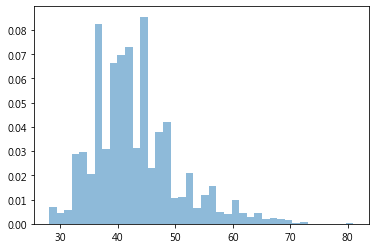

In [27]:
plt.hist(train_data["Age"], density=True,bins=40,alpha=0.5)
plt.show()

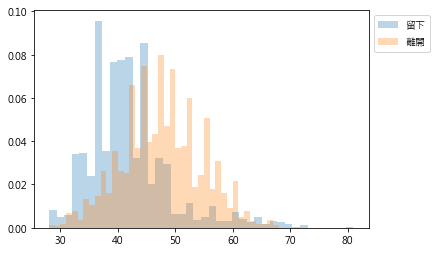

In [28]:
#年齡對於信賴分數差異
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40) 
plt.hist(train_data[train_data["Exited"]==0]["Age"], **kwargs,label="留下") 
plt.hist(train_data[train_data["Exited"]==1]["Age"], **kwargs,label="離開") 
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [29]:
train_data.groupby(["Exited"]).agg({"Age":["describe"]})

Age                                                   
       describe                                                   
          count       mean       std   min   25%   50%   75%   max
Exited                                                            
0        6368.0  41.904052  7.269157  28.0  37.0  41.0  44.0  81.0
1        1632.0  47.218137  6.947660  28.0  42.0  47.0  52.0  68.0

## 針對「Tenure」做分析

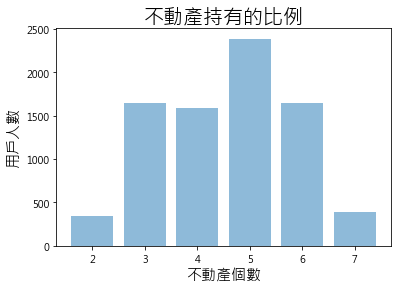

In [30]:
#不動產個數
propertys=train_data["Tenure"].value_counts().sort_index()
x = np.arange(len(propertys))
plt.bar(x, propertys, alpha=0.5)
plt.xticks(x, propertys.index)
plt.xlabel('不動產個數', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('不動產持有的比例', fontsize=20)
plt.show()

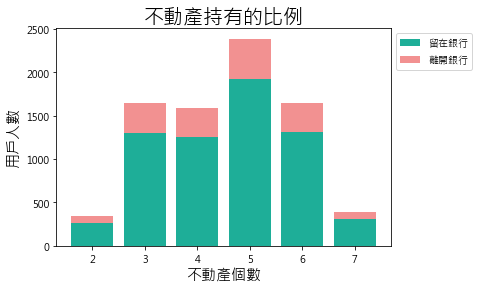

In [31]:
remain=train_data[train_data["Exited"]==0]["Tenure"].value_counts().sort_index()
exit=train_data[train_data["Exited"]==1]["Tenure"].value_counts().sort_index()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, propertys.index)
plt.xlabel('不動產個數', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('不動產持有的比例', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

## 針對「Balance」做分析

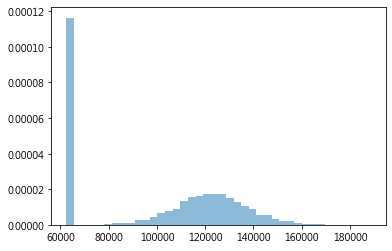

In [32]:
#帳戶面額
plt.hist(train_data["Balance"], density=True,bins=40,alpha=0.5)
plt.show()

In [33]:
sum(train_data["Balance"]>70000)

5062

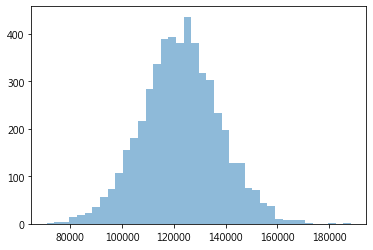

In [34]:
#去掉前面的outlier
plt.hist(train_data["Balance"][train_data["Balance"]>70000],bins=40,alpha=0.5)
plt.show()

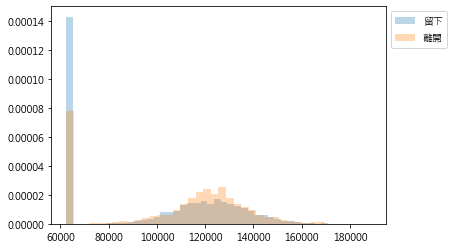

In [35]:
#帳戶面額對於離開與否差異
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40) 
plt.hist(train_data[train_data["Exited"]==0]["Balance"], **kwargs,label="留下") 
plt.hist(train_data[train_data["Exited"]==1]["Balance"], **kwargs,label="離開") 
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [36]:
train_data["greater than 70000"]=train_data["Balance"].apply(lambda x: 1 if x >70000  else 0)

In [37]:
#想嘗試把大於70000的放於前面
train_data[["greater than 70000",'Exited']].corr()

,greater than 70000,Exited
greater than 70000,1.00000,0.12635
Exited,0.12635,1.00000


## 針對「NumOfProducts」做分析

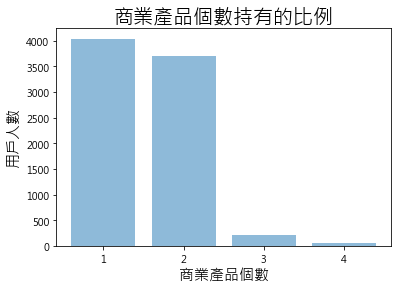

In [38]:
#商業產品個數
Products=train_data['NumOfProducts'].value_counts().sort_index()
x = np.arange(len(Products))
plt.bar(x, Products, alpha=0.5)
plt.xticks(x, Products.index)
plt.xlabel('商業產品個數', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('商業產品個數持有的比例', fontsize=20)
plt.show()

In [39]:
remain

2     258
3    1304
4    1250
5    1927
6    1316
7     313
Name: Tenure, dtype: int64

In [40]:
exit

2     81
3    344
4    335
5    459
6    331
7     82
Name: Tenure, dtype: int64

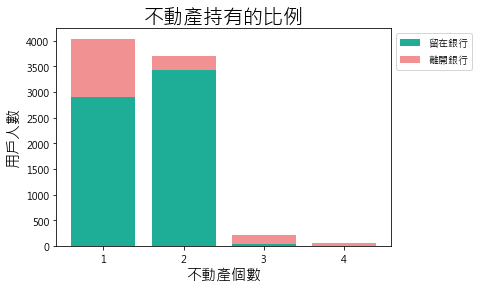

In [41]:
remain=train_data[train_data["Exited"]==0]['NumOfProducts'].value_counts().sort_index()
remain=remain.append(pd.Series([0],index=[4]))
exit=train_data[train_data["Exited"]==1]['NumOfProducts'].value_counts().sort_index()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, Products.index)
plt.xlabel('不動產個數', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('不動產持有的比例', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [42]:
#有高不動產的組成一群
train_data["is_4"]=train_data['NumOfProducts'].apply(lambda x: 1 if x >2  else 0)

In [43]:
train_data[["is_4",'Exited']].corr()

,is_4,Exited
is_4,1.000000,0.302396
Exited,0.302396,1.000000


## 針對「HasCrCard」做分析

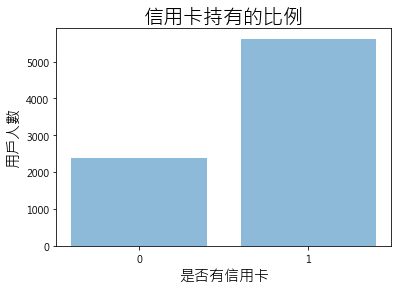

In [44]:
#商業產品個數
Card=train_data['HasCrCard'].value_counts().sort_index()
x = np.arange(len(Card))
plt.bar(x, Card, alpha=0.5)
plt.xticks(x, Card.index)
plt.xlabel('是否有信用卡', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('信用卡持有的比例', fontsize=20)
plt.show()

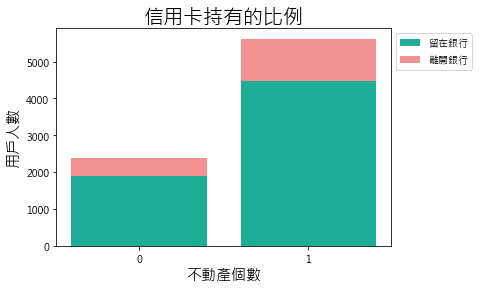

In [45]:
remain=train_data[train_data["Exited"]==0]['HasCrCard'].value_counts().sort_index()
exit=train_data[train_data["Exited"]==1]['HasCrCard'].value_counts().sort_index()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, Card.index)
plt.xlabel('不動產個數', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('信用卡持有的比例', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

## 針對「IsActiveMember」做分析

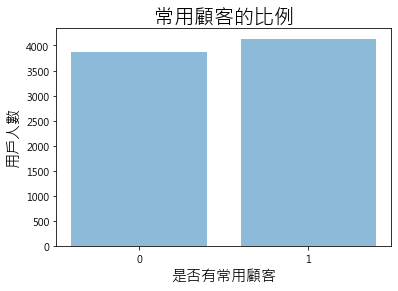

In [46]:
#商業產品個數
Active=train_data['IsActiveMember'].value_counts().sort_index()
x = np.arange(len(Active))
plt.bar(x, Active, alpha=0.5)
plt.xticks(x, Active.index)
plt.xlabel('是否有常用顧客', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('常用顧客的比例', fontsize=20)
plt.show()

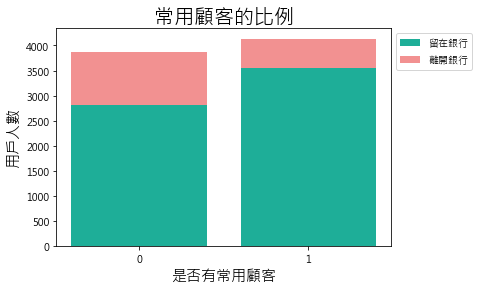

In [47]:
remain=train_data[train_data["Exited"]==0]['IsActiveMember'].value_counts().sort_index()
exit=train_data[train_data["Exited"]==1]['IsActiveMember'].value_counts().sort_index()
plt.bar(x, remain, color="#1eae98", label='留在銀行')
plt.bar(x, exit, color="#f29191", label='離開銀行', bottom=remain)
plt.xticks(x, Active.index)
plt.xlabel('是否有常用顧客', fontsize=15)
plt.ylabel('用戶人數', fontsize=15)
plt.title('常用顧客的比例', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

## 針對「EstimatedSalary」做分析

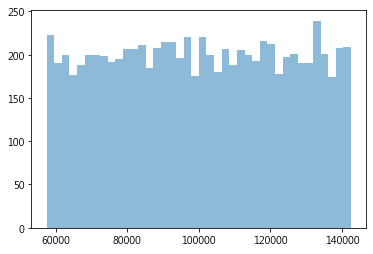

In [48]:
plt.hist(train_data["EstimatedSalary"],bins=40,alpha=0.5)
plt.show()

c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


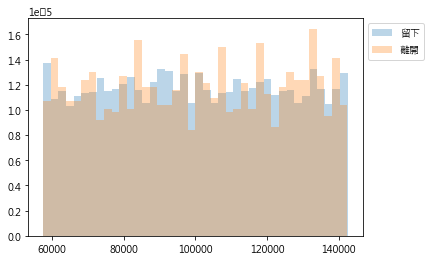

In [49]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40) #以比率來看的density
plt.hist(train_data[train_data["Exited"]==0]["EstimatedSalary"], **kwargs,label="留下") 
plt.hist(train_data[train_data["Exited"]==1]["EstimatedSalary"], **kwargs,label="離開") 
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [50]:
train_data.groupby(["Exited"]).agg({"EstimatedSalary":["describe"]})

EstimatedSalary                                                    \
              describe                                                     
                 count           mean           std       min        25%   
Exited                                                                     
0               6368.0  100007.522054  24478.522291  57555.42  79129.235   
1               1632.0  100478.271330  24643.516479  57522.07  79565.840   

                                            
                                            
               50%          75%        max  
Exited                                      
0        99729.090  121000.2750  142481.99  
1       100760.025  122145.0675  142403.66

## 兩兩特徵相關

In [51]:
remove_userID_data=train_data[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']]

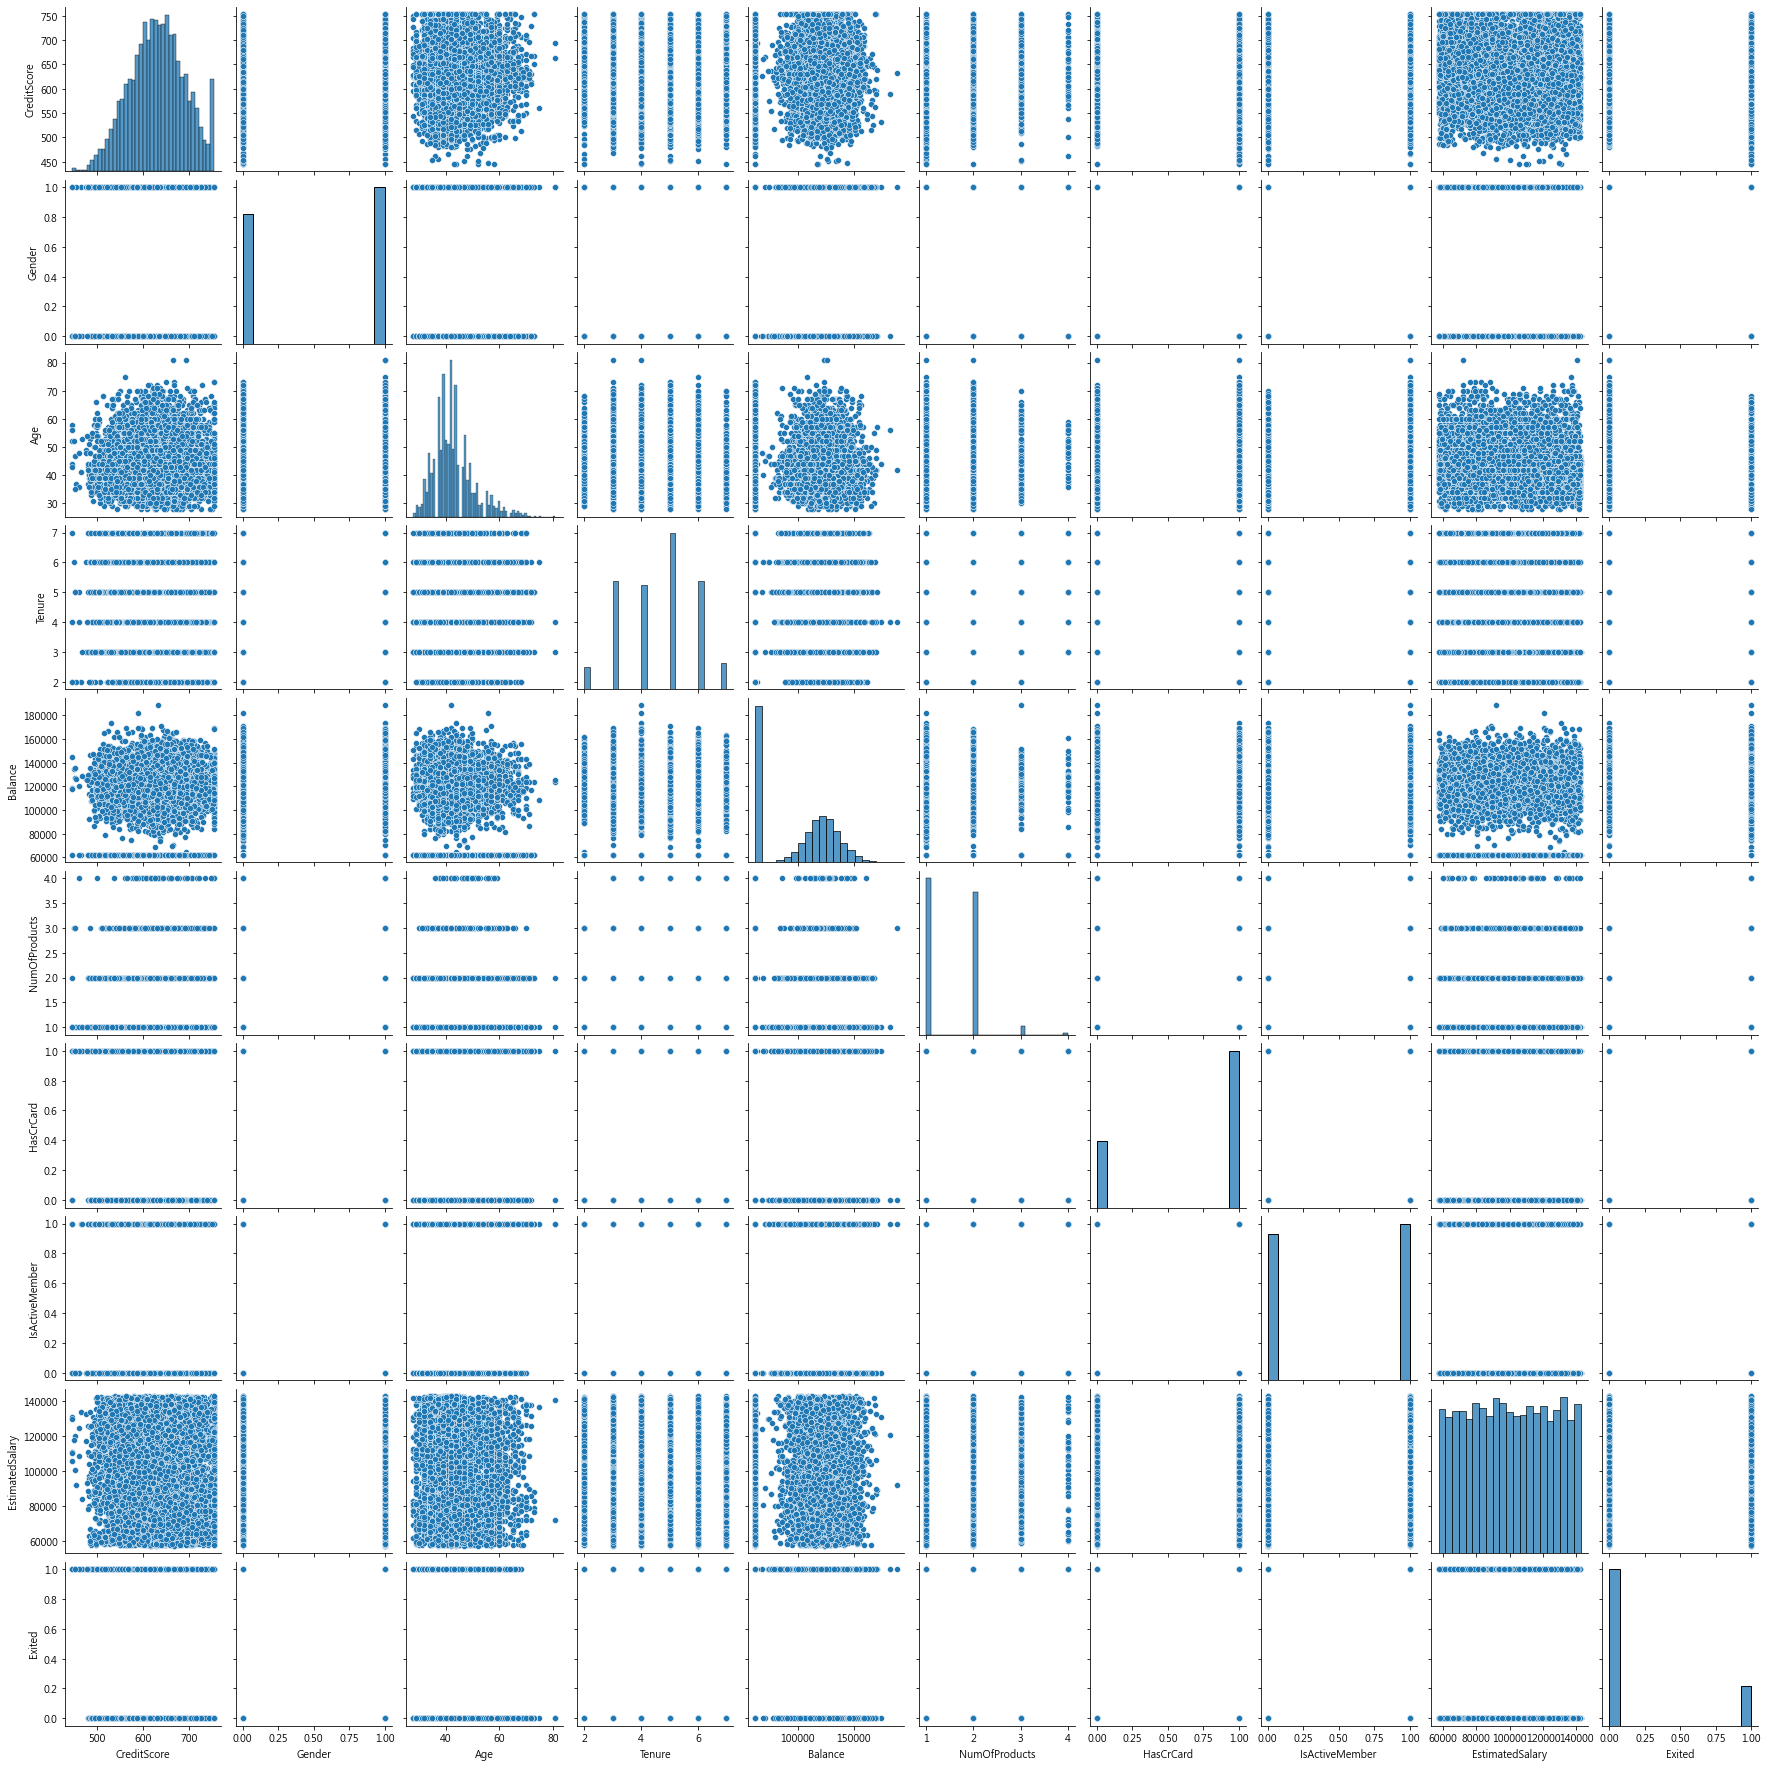

In [52]:
# Seaborn visualization library 
import seaborn as sns 
# Create the default pairplot 
sns.pairplot(remove_userID_data)

In [53]:
remove_userID_data.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.002648,0.002744,0.002374,0.001024,0.008050,-0.013454,0.026846,-0.004503,-0.024877
Gender,-0.002648,1.000000,-0.026296,0.021308,0.017589,-0.030692,-0.001494,0.024992,-0.016613,-0.104481
Age,0.002744,-0.026296,1.000000,-0.005595,0.036458,-0.028103,-0.009543,0.096660,-0.004913,0.284937
Tenure,0.002374,0.021308,-0.005595,1.000000,-0.013555,0.007594,0.024330,-0.019281,0.001388,-0.015832
Balance,0.001024,0.017589,0.036458,-0.013555,1.000000,-0.299640,-0.014920,-0.015470,0.021139,0.120387
NumOfProducts,0.008050,-0.030692,-0.028103,0.007594,-0.299640,1.000000,0.000679,0.010682,0.008099,-0.048936
HasCrCard,-0.013454,-0.001494,-0.009543,0.024330,-0.014920,0.000679,1.000000,-0.007592,-0.020165,-0.006711
IsActiveMember,0.026846,0.024992,0.096660,-0.019281,-0.015470,0.010682,-0.007592,1.000000,-0.011354,-0.158626
EstimatedSalary,-0.004503,-0.016613,-0.004913,0.001388,0.021139,0.008099,-0.020165,-0.011354,1.000000,0.007740
Exited,-0.024877,-0.104481,0.284937,-0.015832,0.120387,-0.048936,-0.006711,-0.158626,0.007740,1.000000
